# Analisis de viajes en taxi

Análisis de datos de la compañía Zuber de viajes compartidos en taxi en Chicago.

## Análisis exploratorio de datos

In [14]:
# Cargar todas las librerías
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats as st

In [2]:
#Carga de datos
df_trips=pd.read_csv('/datasets/project_sql_result_01.csv')
df_location=pd.read_csv ('/datasets/project_sql_result_04.csv')

In [3]:
# Información general/resumida sobre el DataFrame
print("=== TABLA TRIPS ===")
print("Forma de la tabla:", df_trips.shape)
print("\nPrimeras 5 filas:")
print(df_trips.head())
print("\nInformación general:")
print(df_trips.info())
print("\nValores nulos:")
print(df_trips.isnull().sum())
print("\nValores duplicados:")
print(df_trips.duplicated().sum())
print("\nEstadísticas descriptivas:")
print(df_trips.describe())

=== TABLA TRIPS ===
Forma de la tabla: (64, 2)

Primeras 5 filas:
                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                Medallion Leasing         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299

Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None

Valores nulos:
company_name    0
trips_amount    0
dtype: int64

Valores duplicados:
0

Estadísticas descriptivas:
       trips_amount
count     64.000000
mean    2145.484375
std     3812.310186
min        2.000000
25%       20.750000
50%      178.500000
75%     2106.500000
max    19558.0000

In [4]:
# Información general/resumida sobre el DataFrame
print("=== TABLA TRIPS LOCATION ===")
print("Forma de la tabla:", df_location.shape)
print("\nPrimeras 5 filas:")
print(df_location.head())
print("\nInformación general:")
print(df_location.info())
print("\nValores nulos:")
print(df_location.isnull().sum())
print("\nValores duplicados:")
print(df_location.duplicated().sum())
print("\nEstadísticas descriptivas:")
print(df_location.describe())


=== TABLA TRIPS LOCATION ===
Forma de la tabla: (94, 2)

Primeras 5 filas:
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000

Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None

Valores nulos:
dropoff_location_name    0
average_trips            0
dtype: int64

Valores duplicados:
0

Estadísticas descriptivas:
       average_trips
count      94.000000
mean      599.953728
std      1714.591098
min         1.800000
25%        14.266667
50%        52.016667
75%       298.858333



Al revisar los datos se encuentra que los tipos de datos son correctos y no hay valores nulos o duplicados en las columnas.



Los 10 barrios con mayor cantidades de viajes son:

In [5]:
#Los 10 principales barrios en términos de finalización del recorrido
top_end_neighborhoods=df_location.groupby('dropoff_location_name')['average_trips'].sum().reset_index().sort_values('average_trips', ascending=False).head(10)
top_end_neighborhoods

,dropoff_location_name,average_trips
50,Loop,10727.466667
68,River North,9523.666667
78,Streeterville,6664.666667
87,West Loop,5163.666667
63,O'Hare,2546.900000
44,Lake View,2420.966667
35,Grant Park,2068.533333
56,Museum Campus,1510.000000
32,Gold Coast,1364.233333
74,Sheffield & DePaul,1259.766667



Ahora analizaremos gráficamente la cantidad de viajes por empresas de taxi y los 10 barrios principales por número de viajes terminados allí. 

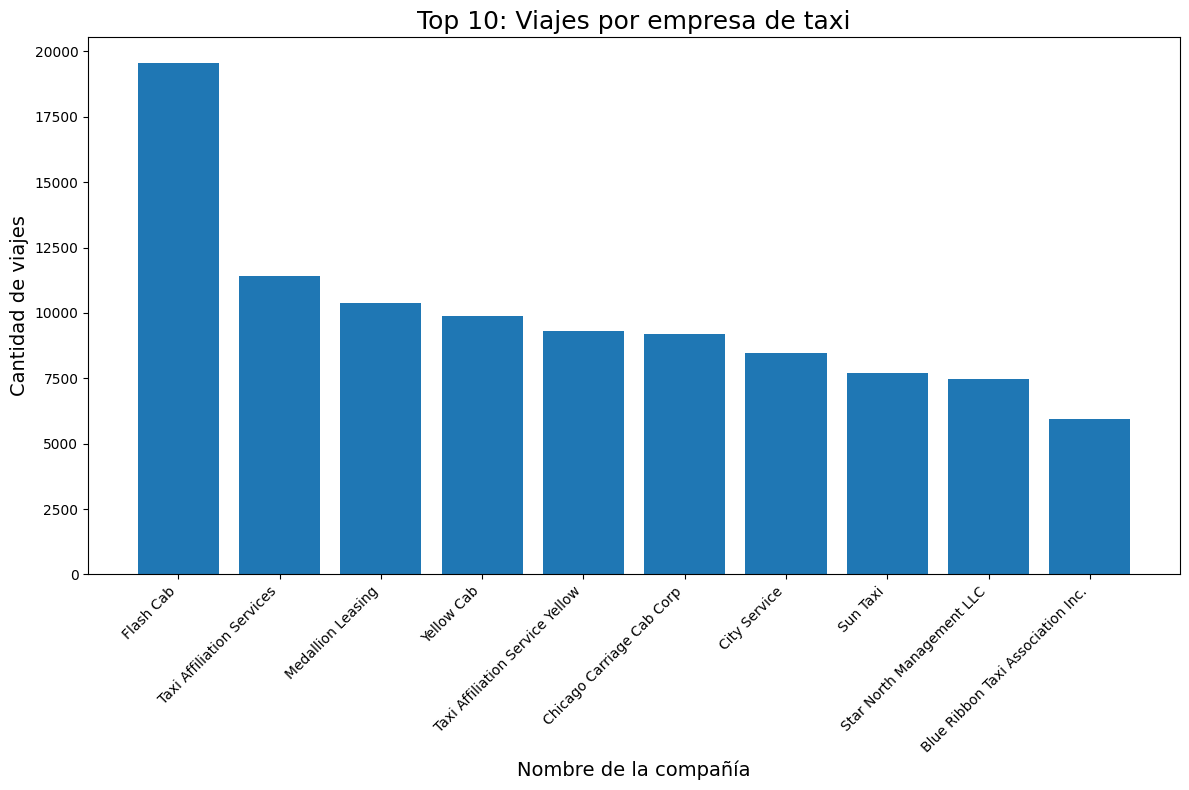

In [6]:
#Gráfico de barras para las 10 principales empresas
df_trips=df_trips.sort_values('trips_amount',ascending=False)

plt.figure(figsize=(12, 8))

df_trips_top10 = df_trips.head(10)  # Solo las 10 principales empresas

plt.bar(df_trips_top10['company_name'], df_trips_top10['trips_amount'])
plt.title('Top 10: Viajes por empresa de taxi', fontsize=18)
plt.xlabel('Nombre de la compañía', fontsize=14)
plt.ylabel('Cantidad de viajes', fontsize=14)
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()

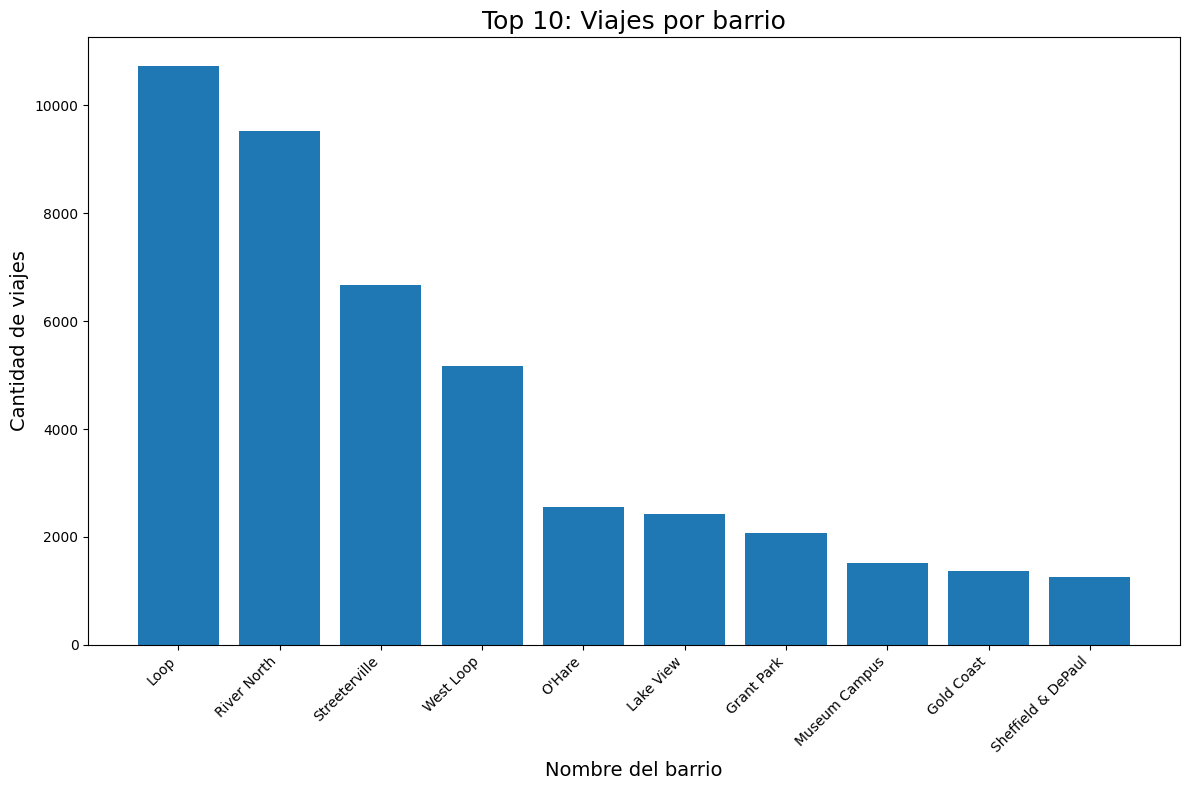

In [7]:
#Gráfico de barras para los 10 barrios principales
plt.figure(figsize=(12, 8))

plt.bar(top_end_neighborhoods['dropoff_location_name'], top_end_neighborhoods['average_trips'])
plt.title('Top 10: Viajes por barrio', fontsize=18)
plt.xlabel('Nombre del barrio', fontsize=14)
plt.ylabel('Cantidad de viajes', fontsize=14)
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()



Los gráficos señalan que Flash Cab lidera la lista de empresas con mas viajes con un total de 19,558 viajes, seguida de Taxi Affiliation Services con 11422 viajes realizados entre el 15 y 16 de noviembre de 2017.

Por otra parte, se observa que los destinos con mayor cantidad de viajes en noviembre del 2017 son Loop y River North con un promedio total de 10,727.466667 y 9,523.666667 viajes respectivamente.


## Prueba de hipótesis

In [13]:
df_loop_ohare=pd.read_csv('/datasets/project_sql_result_07.csv')

# Información general/resumida sobre el DataFrame
print("=== TABLA TRIPS FROM LOOP TO O'HARE ===")
print("Forma de la tabla:", df_loop_ohare.shape)
print("\nPrimeras 5 filas:")
print(df_loop_ohare.head())
print("\nInformación general:")
print(df_loop_ohare.info())
print("\nValores nulos:")
print(df_loop_ohare.isnull().sum())
print("\nEstadísticas descriptivas:")
print(df_loop_ohare.describe())

=== TABLA TRIPS FROM LOOP TO O'HARE ===
Forma de la tabla: (1068, 3)

Primeras 5 filas:
              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0

Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB
None

Valores nulos:
start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

Estadísticas descri

La tabla muestra que el tipo de 'start_ts' se debe corregir a DateTime, por tanto:

In [16]:
df_loop_ohare['start_ts'] = pd.to_datetime(df_loop_ohare['start_ts'])

# Verificar que se convirtió correctamente
print("Tipo de dato después de la conversión:")
print(df_loop_ohare['start_ts'].dtype)
print("\nPrimeras 5 fechas:")
print(df_loop_ohare['start_ts'].head())

Tipo de dato después de la conversión:
datetime64[ns]

Primeras 5 fechas:
0   2017-11-25 16:00:00
1   2017-11-25 14:00:00
2   2017-11-25 12:00:00
3   2017-11-04 10:00:00
4   2017-11-11 07:00:00
Name: start_ts, dtype: datetime64[ns]


Prueba de hipótesis:


- La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos



Hipótesis Nula (H₀): La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare NO cambia los sábados lluviosos


Hipótesis Alternativa (H₁): La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare SÍ cambia los sábados lluviosos


Nivel de significancia (α): 0.05

In [18]:
# Crear nuevas columnas para análisis
df_loop_ohare['day_of_week'] = df_loop_ohare['start_ts'].dt.day_name()
df_loop_ohare['weekday'] = df_loop_ohare['start_ts'].dt.weekday  # 0=Lunes, 6=Domingo

# Verificar los días de la semana disponibles
print("Días de la semana en los datos:")
print(df_loop_ohare['day_of_week'].value_counts())

Días de la semana en los datos:
Saturday    1068
Name: day_of_week, dtype: int64


Se comprobó que los datos son de los días sábado con 1068 datos. Para probar la hipótesis se deben separar los datos entre días lluviosos o con buen clima.

In [24]:
rain_saturdays=df_loop_ohare[df_loop_ohare['weather_conditions']=='Bad']
good_saturdays=df_loop_ohare[df_loop_ohare['weather_conditions']=='Good']

rain_mean = rain_saturdays['duration_seconds'].mean()
good_mean = good_saturdays['duration_seconds'].mean()

print(f"\nPromedio de viaje sábados lluviosos: {rain_mean:.3f}")
print(f"Promedio de viaje sábados con buen clima: {good_mean:.3f}")
print(f"Diferencia: {abs(rain_mean - good_mean):.3f}")


Promedio de viaje sábados lluviosos: 2427.206
Promedio de viaje sábados con buen clima: 1999.676
Diferencia: 427.530


Se encontró que el tiempo promedio de viaje en sábados lluviosos es de 2,427.206 segundos (≈ 40.5 minutos) mientras que en sábados con buen clima es de 1,999.676 segundos (≈ 33.3 minutos) lo que implica una diferencia de 427.53 segundos (≈ 7.1 minutos) más en sábados lluviosos.

Antes de realizar la prueba de hipótesis es necesario realizar la prueba de Levene para evaluar la igualdad de varianzas, esto garantizará que la prueba t sea estadísticamente valida.

Prueba de Levene:

H₀: Las varianzas de la duración promedio de los viajes los sábados lluviosos y los sábados con buen clima son iguales

H₁: Las varianzas de la duración promedio de los viajes son diferentes 

Nivel de significancia (α): 0.05

In [23]:
# Aplicar la prueba de Levene
levene_stat, levene_p = st.levene(rain_saturdays['duration_seconds'], good_saturdays['duration_seconds'])
alpha = 0.05

print("=== PRUEBA DE LEVENE ===")
print(f"Hipótesis Nula (H₀): Las varianzas son iguales")
print(f"Hipótesis Alternativa (H₁): Las varianzas son diferentes")
print(f"Nivel de significancia (α): 0.05")
print(f"\nResultados:")
print(f"Estadístico de Levene: {levene_stat:.3f}")
print(f"Valor p: {levene_p:.3f}")

# Interpretación
if levene_p > alpha:
    print(f"\nCONCLUSIÓN: No rechazamos H₀")
    print(f"Las varianzas son iguales - Podemos usar prueba t estándar")
    varianzas_iguales = True
else:
    print(f"\nCONCLUSIÓN: Rechazamos H₀")
    print(f"Las varianzas son diferentes - Usar prueba t de Welch")
    varianzas_iguales = False

=== PRUEBA DE LEVENE ===
Hipótesis Nula (H₀): Las varianzas son iguales
Hipótesis Alternativa (H₁): Las varianzas son diferentes
Nivel de significancia (α): 0.05

Resultados:
Estadístico de Levene: 0.389
Valor p: 0.533

CONCLUSIÓN: No rechazamos H₀
Las varianzas son iguales - Podemos usar prueba t estándar


In [26]:
# Aplicar la prueba t apropiada según el resultado de Levene
if varianzas_iguales:
    # Usar prueba t estándar (equal_var=True)
    t_stat, t_p = st.ttest_ind(rain_saturdays['duration_seconds'], good_saturdays['duration_seconds'], equal_var=True)
    print("\nUsando prueba t de Student estándar")
else:
    # Usar prueba t de Welch (equal_var=False)
    t_stat, t_p = st.ttest_ind(xbox_scores, pc_scores, equal_var=False)
    print("\nUsando prueba t de Welch (varianzas desiguales)")

print("=== PRUEBA DE HIPÓTESIS ===")
print(f"Hipótesis Nula (H₀): La duración promedio de los viajes desde el Loop hasta O'Hare NO cambia los sábados lluviosos")
print(f"Hipótesis Alternativa (H₁): La duración promedio de los viajes desde el Loop hasta O'Hare SÍ cambia los sábados lluviosos")
print(f"Nivel de significancia (α): {alpha}")
print(f"\nResultados:")
print(f"Estadístico t: {t_stat:.3f}")
print(f"Valor p: {t_p}")

if t_p < alpha:
    print(f"\nCONCLUSIÓN: Rechazamos H₀")
    print(f"Existe suficiente evidencia estadística de que la duración promedio de los viajes desde el Loop hasta O'Hare SI cambia los sábados lluviosos")
else:
    print(f"\nCONCLUSIÓN: No rechazamos H₀") 
    print(f"No hay evidencia suficiente de que la duración promedio de los viajes desde el Loop hasta O'Hare NO cambia los sábados lluviosos")



Usando prueba t de Student estándar
=== PRUEBA DE HIPÓTESIS ===
Hipótesis Nula (H₀): La duración promedio de los viajes desde el Loop hasta O'Hare NO cambia los sábados lluviosos
Hipótesis Alternativa (H₁): La duración promedio de los viajes desde el Loop hasta O'Hare SÍ cambia los sábados lluviosos
Nivel de significancia (α): 0.05

Resultados:
Estadístico t: 6.946
Valor p: 6.517970327099473e-12

CONCLUSIÓN: Rechazamos H₀
Existe suficiente evidencia estadística de que la duración promedio de los viajes desde el Loop hasta O'Hare SI cambia los sábados lluviosos




En la prueba de hipótesis se estableció como nivel de significancia (alpha) igual a 0.05 para comprobar si se rechazaba o no la hipótesis nula, dado que es un punto medio práctico pues no es muy estricto ni muy flexible dejando un 95% de confianza. 

El resultado de p-value indica que la evidencia estadística es muy fuerte, es decir que definitivamente los sábados lluviosos afectan la duración de los viajes. El porcentaje de tiempo es de:

In [27]:
porcentaje_aumento = ((2427.206 - 1999.676) / 1999.676) * 100
print(f"Los viajes duran {porcentaje_aumento:.1f}% más tiempo en días lluviosos")

Los viajes duran 21.4% más tiempo en días lluviosos


##Conclusión

En este proyecto se analizaron los datos de Zuber empresa de viajes en Chicago durante noviembre del 2017. Como inicio se cargaron los datos, pasando a revisión y corrección de la información antes de analizarla. En primera instancia se obtienen los diez barrios principales de finalización del recorrido, encabezados por Loop y River North. De igual manera, las diez empresas de taxi con más viajes, siendo Flash Cab la de mayor concurrencia, seguida de Taxi Affiliation Services.

En la prueba de hipótesis se encontró que los viajes promedio duran 21.4% más, un sábado lluvioso que un sábado con buen clima. Lo que puede tener diferentes implicaciones para la empresa, debido a que cada taxi estará ocupado más tiempo disminuyendo la cantidad de los vehículos disponibles para suplir la demanda del servicio. Zuber, puede realizar proyecciones de demanda basados en los históricos de las otras empresas del mercado, permitiendo anticipar la demanda para los sábados lluviosos. 

De igual manera, se debe informar a los clientes sobre los tiempos de espera extendidos y el alza de precios, considerando tarifas dinámicas por mayor tiempo de viaje. 

Por otra parte, el aumento del tiempo por viaje en un sábado lluvioso puede incrementar la cantidad de mantenimientos a realizar, dado que los vehículos trabajaran más horas. Así como el incremento en el consumo de combustible por viaje. 

Una sugerencia que Zuber puede analizar a futuro, es optar por viajes compartidos (carpool) en los días lluviosos y para los barrios con mayor cantidad de viajes. Ees decir, que dos o más personas en puntos cercanos compartan el vehículo. Generando reducción de costos para los usuarios, optimización de recursos para la empresa y mayor disponibilidad de los vehículos.
